# Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


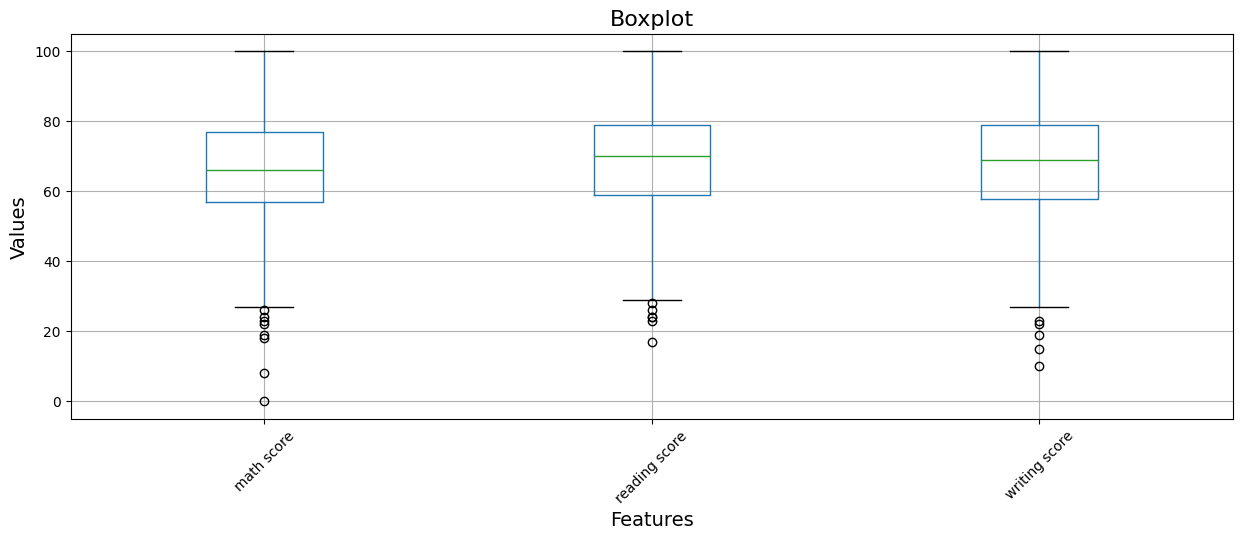

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
df.boxplot(column=['math score', 'reading score', 'writing score'], ax=ax)

ax.set_title('Boxplot', fontsize=16)
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Values', fontsize=14)

plt.xticks(rotation=45)

plt.show() #there are outliers among three features

Text(0.5, 1.0, 'Distribution of writing score')

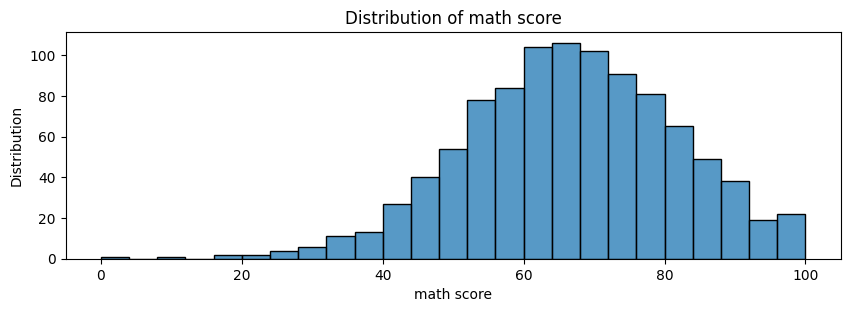

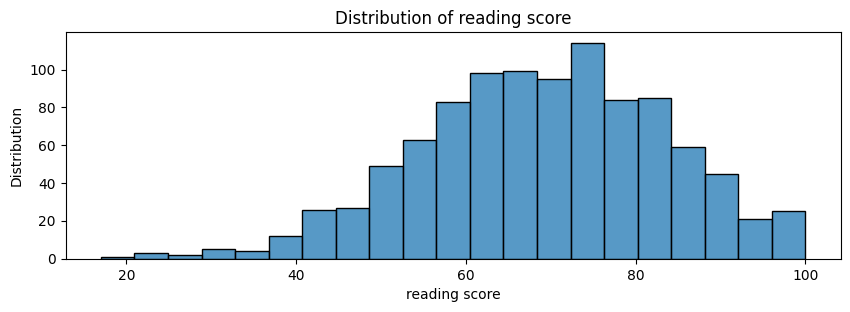

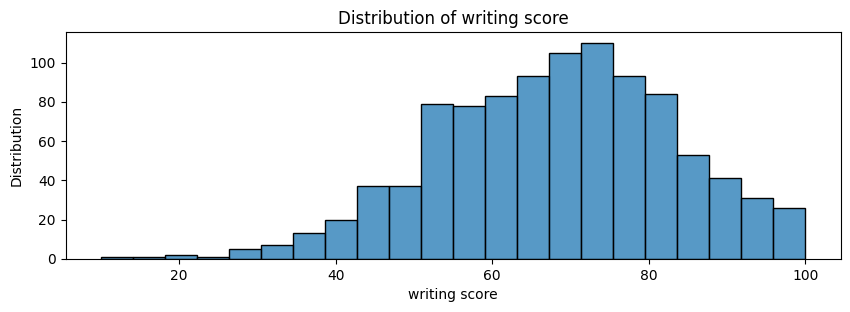

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(3,1,1)
sns.histplot(data=df,x=df['math score'])
plt.xlabel('math score')
plt.ylabel('Distribution')
plt.title('Distribution of math score')

plt.figure(figsize=(10, 10))
plt.subplot(3,1,2)
sns.histplot(data=df,x=df['reading score'])
plt.xlabel('reading score')
plt.ylabel('Distribution')
plt.title('Distribution of reading score')

plt.figure(figsize=(10, 10))
plt.subplot(3,1,3)
sns.histplot(data=df,x=df['writing score'])
plt.xlabel('writing score')
plt.ylabel('Distribution')
plt.title('Distribution of writing score')

In [10]:
re_counts = df['race/ethnicity'].value_counts()
re_counts

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

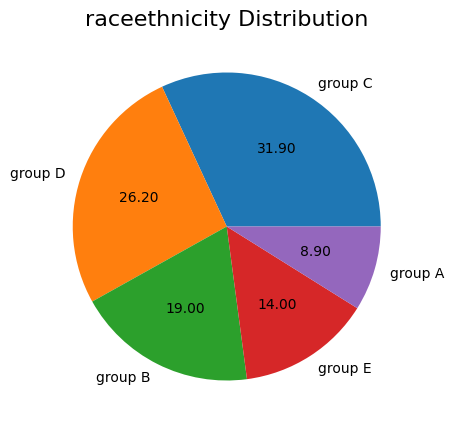

In [11]:
plt.figure(figsize=(5,5))
plt.pie(re_counts, labels=re_counts.index, autopct='%.2f')

plt.title('raceethnicity Distribution', fontsize=16)

plt.show()

# Data cleaning

In [12]:
#replace space with "_"
df.columns = df.columns.str.replace(' ', '_')

In [13]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
#select the features
X = df[['math_score', 'reading_score', 'writing_score']]
y = df['race/ethnicity']

In [16]:
#remove outliers
from scipy import stats

#set 3 as the threshold for the Z-score
threshold = 3

#calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(X[['math_score', 'reading_score', 'writing_score']]))

#find the indices of the data points with a Z-score greater than the threshold
outlier_indices = (z_scores > threshold).any(axis=1)

#filter the DataFrame to exclude the outliers
X_new = X[~outlier_indices]

#check the number of removed outliers
print("Number of removed outliers:", np.sum(outlier_indices))
print("Shape of X_new:", X_new.shape)

Number of removed outliers: 7
Shape of X_new: (993, 3)


In [17]:
#update y to align with the modified dataset
y = y[~outlier_indices]

In [18]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=123)

In [19]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
model = RandomForestClassifier(n_estimators=10, max_depth=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.32
Confusion Matrix:
 [[ 0  3 14  1  0]
 [ 0  3 31  4  0]
 [ 0  7 40 16  2]
 [ 0  4 28 18  2]
 [ 0  0 19  4  3]]


In [20]:
import pickle
#open a file and use dump()
with open('studentsporformance.pkl', 'wb') as file:
    pickle.dump(model, file)